# Import Libraries 


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Read Data 




In [15]:
df = pd.read_csv('/home/clivence/base_jupyter/Datadump/Master_data.csv')
df.head()

,datetime,open,high,low,close,25EMA,50EMA,75EMA,100EMA,125EMA,...,ROI Since Alert,2D Lowest Price,2D Highest Price,2D Low in Pips,2D High in Pips,2D Trade Status,2D Hard Stop Price,2D Hard Stop Loss,2D Trend Change Stop Price,2D Trend Change Stop Loss
0,2020-12-10 19:00:00,1.21430,1.21605,1.21405,1.21580,1.215800,1.215800,1.215800,1.215800,1.215800,...,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,2020-12-10 23:00:00,1.21585,1.21635,1.21260,1.21300,1.215585,1.215690,1.215726,1.215745,1.215756,...,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2020-12-11 03:00:00,1.21300,1.21375,1.21105,1.21205,1.215313,1.215547,1.215630,1.215671,1.215697,...,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,2020-12-11 07:00:00,1.21225,1.21315,1.21055,1.21055,1.214946,1.215351,1.215496,1.215570,1.215615,...,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,2020-12-11 11:00:00,1.21070,1.21205,1.21070,1.21140,1.214674,1.215197,1.215388,1.215487,1.215548,...,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


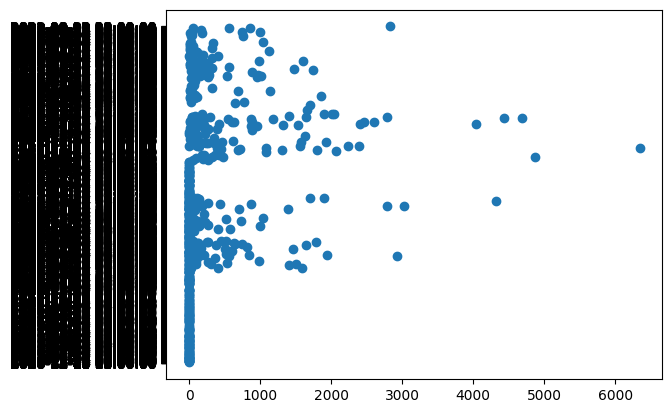

In [21]:
plt.scatter(x=df['2D High in Pips'], y=df.datetime )

In [16]:
df.columns

Index(['datetime', 'open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA',
       '100EMA', '125EMA', 'Ticker', 'Interval', 'Month', 'Month #', 'Year',
       'Date', 'Primary_Key', 'Trend Status', 'Trend Status Enhanced',
       'Spread', '5075 Trend Status', '75100 Trend Status',
       '100125 Trend Status', 'Action', 'Opportunity', 'Order Type', 'Alerts',
       'Index_Special', 'Alerts_Index', 'ROI Since Alert', '2D Lowest Price',
       '2D Highest Price', '2D Low in Pips', '2D High in Pips',
       '2D Trade Status', '2D Hard Stop Price', '2D Hard Stop Loss',
       '2D Trend Change Stop Price', '2D Trend Change Stop Loss'],
      dtype='object')

## Preprocessing 


In [3]:
#Subset for trades
df = df[df['Alerts'] ==1] 
df = df[df['Action'] == 'Ultimate Action']
df = df[df['Ticker'] == 'GBP/USD']

df.fillna(0, inplace=True)

In [4]:
#Subset of features to keep
df= df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA','100EMA', '125EMA',
        'Trend Status', 'Spread','5075 Trend Status', '75100 Trend Status',
       '100125 Trend Status', 'Action', 'Opportunity', 'Order Type','2D Lowest Price',
       '2D Highest Price', '2D Low in Pips', '2D High in Pips',
       '2D Trade Status', '2D Hard Stop Price', '2D Hard Stop Loss',
       '2D Trend Change Stop Price', '2D Trend Change Stop Loss']]

In [5]:
#Apply one-hot encoding 
df= pd.get_dummies(df,columns=['Trend Status','5075 Trend Status', '75100 Trend Status',
       '100125 Trend Status', 'Action', 'Opportunity', 'Order Type'])

In [9]:
#Indepedent Variables 
X = df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA', '100EMA',
       '125EMA', 'Spread','Trend Status_Bearish',
       'Trend Status_Bullish', '5075 Trend Status_Bearish',
       '5075 Trend Status_Bullish', '75100 Trend Status_Bearish',
       '75100 Trend Status_Bullish', '100125 Trend Status_Bearish',
       '100125 Trend Status_Bullish', 'Action_Ultimate Action',
       'Opportunity_Optimal', 'Opportunity_Unfavorable', 'Order Type_BUY',
       'Order Type_SELL']]
#Dependent Variable
Y = df['2D High in Pips'] 

In [7]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_model = LinearRegression()

In [13]:
lin_model.fit(X_train,Y_train)

LinearRegression()

In [14]:
lin_model.score(X_test,Y_test)

-0.1592626079511914